# Can we explain rotation curves without dark matter?

#### Don't forget to run the first block of code below!

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

### Load the data for an individual galaxy

#### Change the variable `galaxy_name` to study a different galaxy

In [22]:
galaxy_name = 'NGC3741'

R, V_obs, error_V_obs, V_gas, V_disk, V_bulge, SB_disk, SB_bulge = np.loadtxt('/home/rohit/Desktop/Dark Matter/SPARC_data/'+galaxy_name+'_rotmod.dat', unpack=True)

### Plot the surface brightness at different radii

This plots the surface brightness of the galaxy at different radii. Note the y axis is on a *logarithmic* scale, not a linear scale. If you are curious as to how this would look on a linear y axis, change the line

    ax.set_yscale('log')
    
to 
    
    # ax.set_yscale('log')

<IPython.core.display.Javascript object>


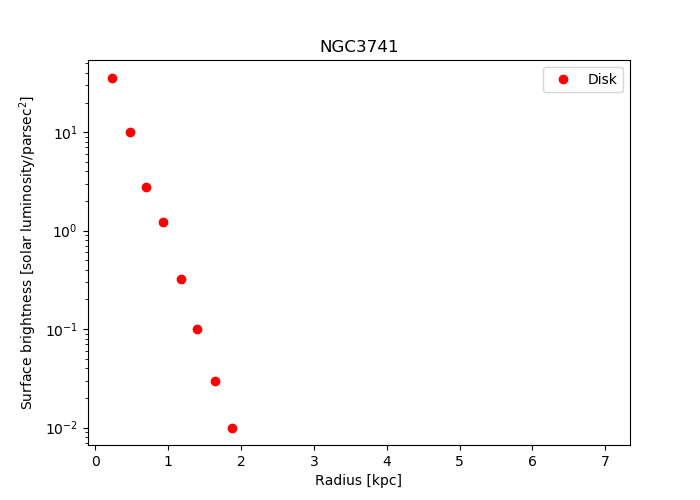

In [23]:
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(R,SB_disk,'o', color='red', label='Disk')

if sum(SB_bulge)>0.:
    ax.plot(R,SB_bulge,'o', color='Turquoise', label='Bulge')
    
ax.set_title(galaxy_name)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Surface brightness [solar luminosity/parsec$^2$]')
ax.legend()

### Plot the rotational velocity data provided in the SPARC data

The rotational velocity components from the stars in the disk (and bulge, if applicable) are calculated by the SPARC authors assuming a M/L ratio of 0.5. The inferred dark matter contribution to the rotation curve is obtained by subtracting the visible matter contribution from the total observed rotational velocity, in quadrature:

$$
v_{DM}^2 = v_{obs}^2 - v_{visible}^2
$$

$$
v_{DM} = \sqrt{v_{obs}^2 - v_{visible}^2}
$$

Why the square root? Remember 
$$
v_{rot}^2 = \frac{G M}{R}
$$

If you are trying to find the total rotational velocity from two different mass contributions (e.g. dark matter and visible matter)

$$
\frac{G M_{total}}{R} = \frac{G (M_1+M_2)}{R} = \frac{G M_1}{R}+ \frac{G M_2}{R}  = v_1^2 + v_2^2
$$

Since $v_{obs}$ is the total rotational speed resulting from the influence of both visible and dark matter, we have

$$
v_{obs}^2 = v_{DM}^2 + v_{visible}^2
$$

and thus 

$$
v_{DM} = \sqrt{v_{obs}^2 - v_{visible}^2}
$$

<IPython.core.display.Javascript object>


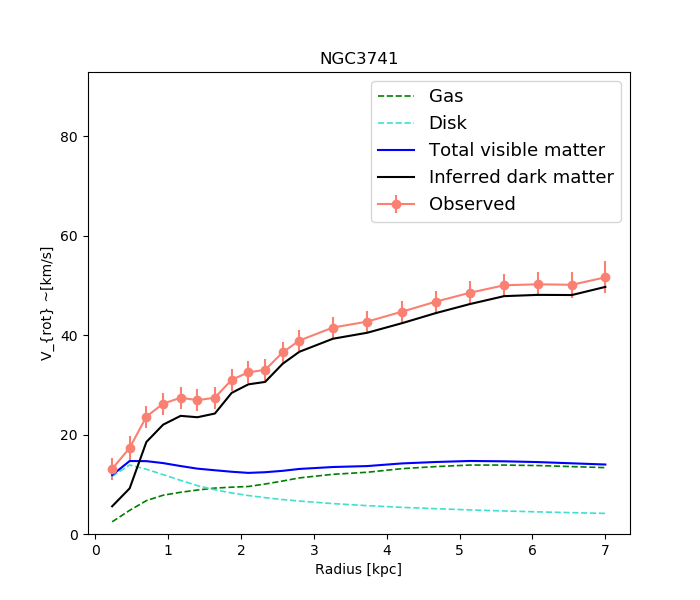

In [24]:
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)

V_visible = np.sqrt(V_gas**2 + V_disk**2 + V_bulge**2 )
V_DM = np.sqrt(V_obs**2 - V_visible**2)

ax.errorbar(R, V_obs , yerr=error_V_obs, marker='o', color='Salmon', label='Observed')
ax.plot(R, V_gas, '--', color='green', linewidth=1.2, label='Gas')
ax.plot(R, V_disk, '--', color='Turquoise', linewidth=1.2, label='Disk')
if sum(V_bulge)>0.:
    ax.plot(R, V_bulge, '--', color='purple', linewidth=1.2, label='Bulge')

ax.plot(R, V_visible, '-', color='Blue', label='Total visible matter')
ax.plot(R, V_DM, '-', color='black', label='Inferred dark matter')


    
ax.set_title(galaxy_name)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('V_{rot} ~[km/s]')
ax.set_ylim([0,1.8*np.max(V_obs)])

ax.legend(fontsize=13)

### Plot the density distribution of visible and dark matter

You should have already come up with an expression for the average mass density in a spherical shell that lies between radii $r_i$ and $r_{i+1}$. The code below uses that expression to calculate the density of each shell, and then plots density as a function of distance from the center of the galaxy (it uses the midpoint $\frac{1}{2}(r_i+r_{i+1})$ as the radial distance).

In [25]:
GNewton=4.43e-6   # kpc (km/s)2 / solar mass
V_shell=[(4./3)*np.pi*R[0]**3]
M_shell=[R[0]*V_obs[0]**2/GNewton]
M_vis_shell=[ R[0]*V_visible[0]**2/GNewton ]
R_midpt = [0.5*R[0]]
for i in range(1,len(R)):
    V_shell.append( (4./3)*np.pi*(R[i]**3 - R[i-1]**3) )
    M_shell.append( R[i]*V_obs[i]**2/GNewton - M_shell[i-1])
    M_vis_shell.append(R[i]*V_visible[i]**2/GNewton - M_vis_shell[i-1] )
    R_midpt.append(0.5*(R[i]+R[i-1]))

<IPython.core.display.Javascript object>


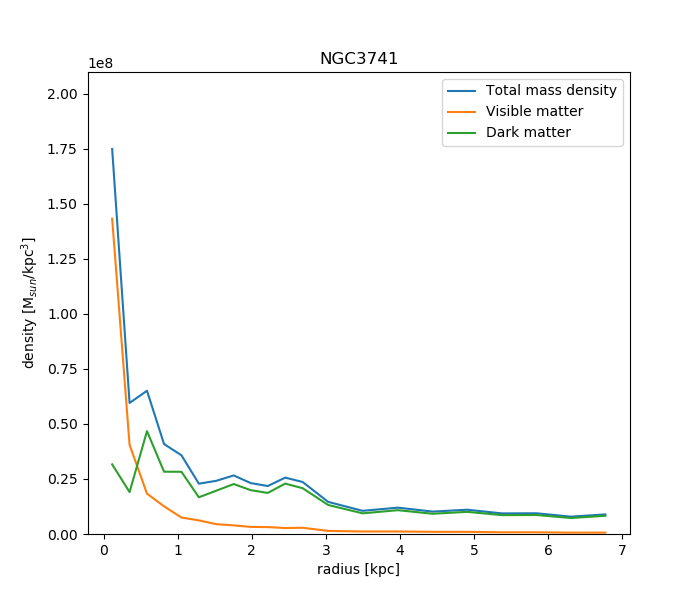

In [26]:
density = np.array(M_shell)/np.array(V_shell)
vis_density = np.array(M_vis_shell)/np.array(V_shell)
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
#ax.set_yscale('log')
ax.plot(R_midpt,density,'-', label='Total mass density')
ax.plot(R_midpt, vis_density, '-', label='Visible matter' )
ax.plot(R_midpt, density-vis_density, label='Dark matter')
ax.set_ylim([0,1.2*np.max(density)])
ax.set_xlabel('radius [kpc]')
ax.set_ylabel('density [M$_{sun}$/kpc$^3$]')
ax.set_title(galaxy_name)
ax.legend()

### Varying the mass-to-light ratio: Can you fit the data without dark matter?

Change your mass-to-light ratio by setting it to a new value in the code block below. Can you play around with it such that the resulting rotation curve from visible matter alone is a good match to the observed rotation curve?

The code below will scale the stellar rotational velocity in accordance with the mass-to-light ratio you provide, and then add this in quadrature with the gas contribution to give you a prediction for the rotation curve from visible matter.

In [83]:
ML_ratio=9

<IPython.core.display.Javascript object>


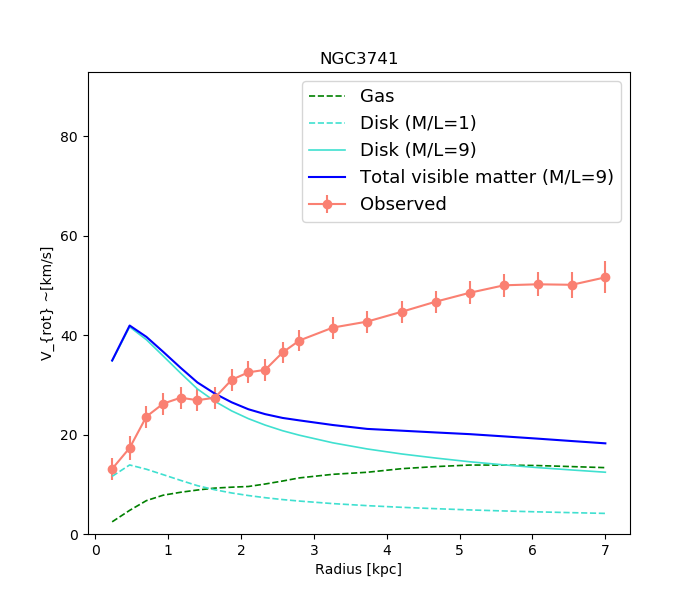

In [84]:
#M_stars= V_disk**2 * R/GNewton
#V_stars_adjusted = np.sqrt(GNewton* np.array(M_stars) /R)
V_stars_adjusted = np.sqrt(ML_ratio)*V_disk
V_bulge_adjusted = np.sqrt(ML_ratio)*V_bulge

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)

V_visible_adjusted = np.sqrt(V_gas**2 + V_stars_adjusted**2 + V_bulge_adjusted**2 )
V_DM = np.sqrt(V_obs**2 - V_visible**2)

ax.errorbar(R, V_obs , yerr=error_V_obs, marker='o', color='Salmon', label='Observed')
ax.plot(R, V_gas, '--', color='green', linewidth=1.2, label='Gas')
ax.plot(R, V_disk, '--', color='turquoise', linewidth=1.2, label='Disk (M/L=1)')
ax.plot(R, V_stars_adjusted, '-', color='turquoise', linewidth=1.2, label='Disk (M/L='+repr(ML_ratio)+')')

if sum(V_bulge)>0.:
    ax.plot(R, V_bulge, '--', color='purple', linewidth=1.2, label='Bulge (M/L=1)')
    ax.plot(R, V_bulge, '-', color='purple', linewidth=1.2, label='Bulge (M/L='+repr(ML_ratio)+')')

ax.plot(R, V_visible_adjusted, '-', color='blue', label='Total visible matter (M/L='+repr(ML_ratio)+')')
#ax.plot(R, V_DM, '-', color='black', label='Inferred dark matter')


    
ax.set_title(galaxy_name)
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('V_{rot} ~[km/s]')
ax.set_ylim([0,1.8*np.max(V_obs)])

ax.legend(fontsize=13)

#### The following block of code will compute the $\chi^2$ per degree of freedom for your model. 

In [85]:
chi2=0.
for i in range(len(R)):
    chi2+=(V_obs[i]-V_visible_adjusted[i])**2/error_V_obs[i]**2
deg_of_freedom=len(R)-1
chi2_per_dof=chi2/deg_of_freedom
print('Chi squared per degree of freedom = ',chi2_per_dof)

Chi squared per degree of freedom =  79.51112580745226
